#**EXP NAME:DELTA MODULATION**
#**REG NO: 212224060266**
#**NAME: SUJITHA ESTHER**

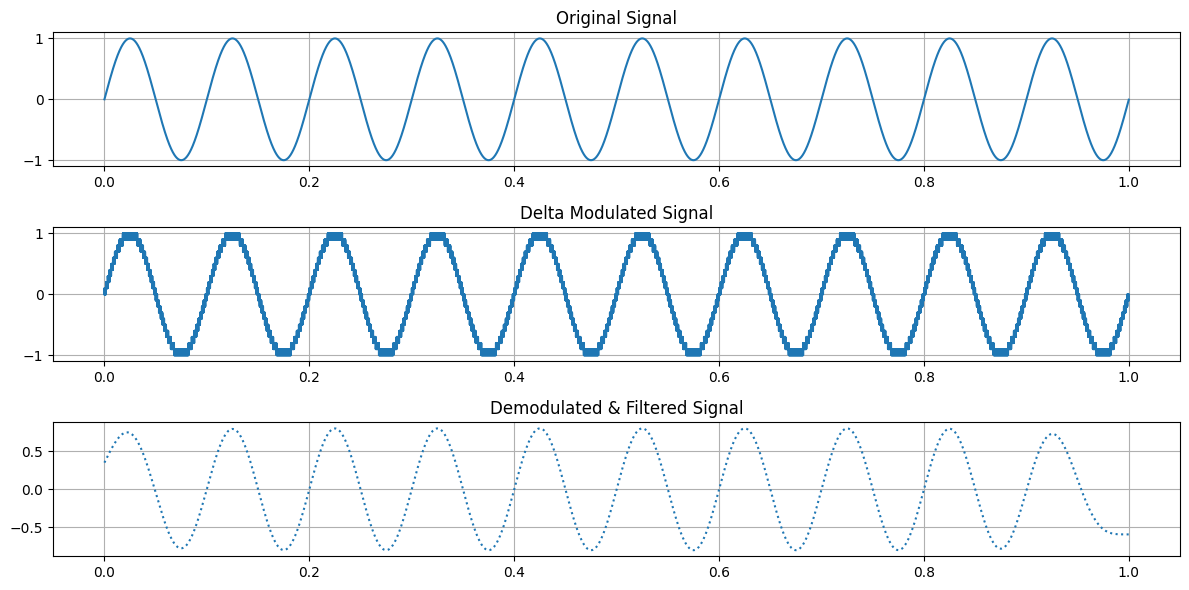

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 10000
f = 10
T = 1
delta = 0.1

t = np.arange(0, T, 1/fs)
message_signal = np.sin(2 * np.pi * f * t)

encoded_signal = np.zeros(len(t))
dm_output = np.zeros(len(t))

for i in range(1, len(t)):
    if message_signal[i] > dm_output[i-1]:
        encoded_signal[i] = 1
        dm_output[i] = dm_output[i-1] + delta
    else:
        encoded_signal[i] = 0
        dm_output[i] = dm_output[i-1] - delta

def low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low')
    return filtfilt(b, a, signal)

filtered_signal = low_pass_filter(dm_output, cutoff_freq=12, fs=fs)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, message_signal)
plt.title("Original Signal")
plt.grid()

plt.subplot(3, 1, 2)
plt.step(t, dm_output, where='mid')
plt.title("Delta Modulated Signal")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, linestyle='dotted')
plt.title("Demodulated & Filtered Signal")
plt.grid()

plt.tight_layout()
plt.show()